In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [37]:
def combine(greenScreenImage, scenicImage):
    # Read in the image
    image = cv2.imread(greenScreenImage)
    background = cv2.imread(scenicImage)
    #print out the type of image data and its dimensions (height, width, and color)
    height = background.shape[0]
    width = background.shape[1]

    # Make a copy of the image
    image_copy = np.copy(image)
    image_copy = cv2.resize(image, (width, height),interpolation = cv2.INTER_LINEAR)
    # Change color to RGB (from BGR)
    image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

    lower_green = np.array([0, 100, 0])    
    upper_green = np.array([126, 255, 100])

    # Define the masked area
    mask = cv2.inRange(image_copy, lower_green, upper_green)

    # Mask the image to let the pizza show through
    masked_image = np.copy(image_copy)
    masked_image[mask != 0] = [0, 0, 0]

    # Load in a background image, and convert it to RGB 
    
    background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
    background_image = np.copy(background)
    
    # Mask the cropped background so that the pizza area is blocked
    background_image[mask == 0] = [0, 0, 0]

    # Add the two images together to create a complete image!
    final_image = background_image + masked_image
    
    white = np.zeros([height,width,3],dtype=np.uint8)
    white.fill(255)
    white[mask == 0] = [0, 0, 0]
    white_background = white + masked_image
    
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(19.20,10.80))
    axes[0, 0].imshow(image_copy)
    axes[0, 0].title.set_text('Photo of a person with green screen')
    axes[0, 0].axis('off')
    axes[0, 1].imshow(white_background)
    axes[0, 1].title.set_text('Photo of the same person with white background')
    axes[0, 1].axis('off')
    axes[1, 0].imshow(background)
    axes[1, 0].title.set_text('Scenic photo')
    axes[1, 0].axis('off')
    axes[1, 1].imshow(final_image)
    axes[1, 1].title.set_text('The same person in the scenic photo')
    axes[1,1].axis('off')
    plt.savefig('chroma.png', dpi = 100)
    final = cv2.imread('chroma.png')
    
    # Display the result
    cv2.imshow('CHROMA KEY',final)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

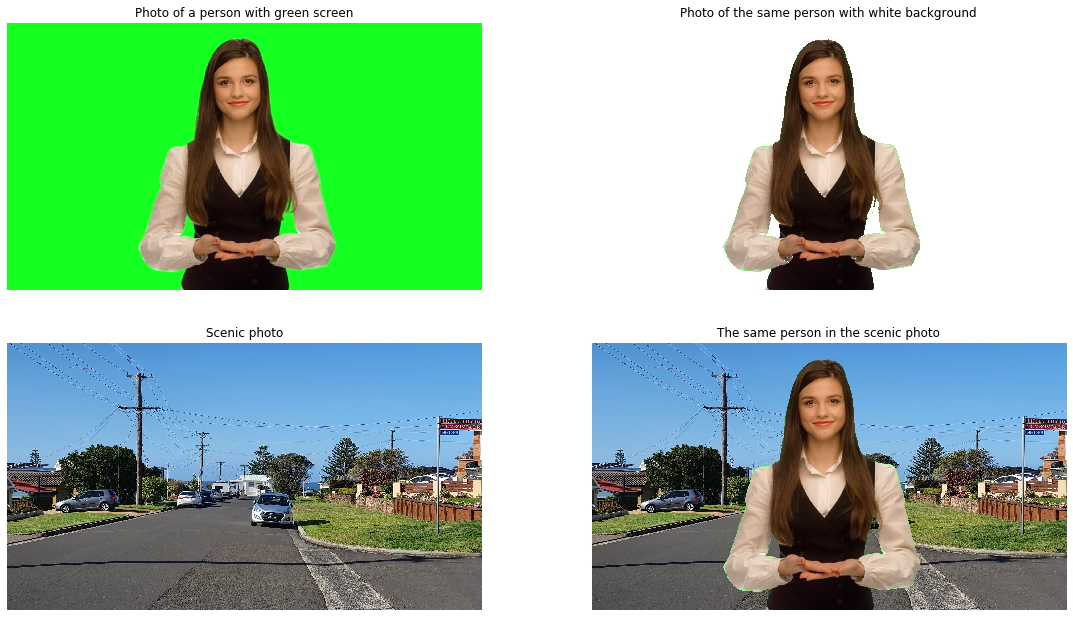

In [38]:
combine('greenScreen03.jpg', 'scenic04.jpg')

In [39]:
def split(color_space, Image):
    image = cv2.imread(Image)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if color_space == 'XYZ':
        img = cv2.cvtColor(image, cv2.COLOR_BGR2XYZ)
    elif color_space == 'Lab':
        img = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    elif color_space == 'YCrCb':
        img = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    elif color_space == 'HSB':
        img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    else:
        print("Wrong Argument")
        return
    
    x,y,z = cv2.split(img)
    
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(19.20,10.80))
    axes[0, 0].imshow(rgb)
    axes[0, 0].title.set_text('Original Image')
    axes[0, 0].axis('off')
    axes[0, 1].imshow(x, cmap="gray")
    axes[0, 1].title.set_text('C1')
    axes[0, 1].axis('off')
    axes[1, 0].imshow(y, cmap="gray")
    axes[1, 0].title.set_text('C2')
    axes[1, 0].axis('off')
    axes[1, 1].imshow(z, cmap="gray")
    axes[1, 1].title.set_text('C3')
    axes[1,1].axis('off')
    plt.savefig('colorspaces.png', dpi = 100)
    final = cv2.imread('colorspaces.png')
    
    # Display the result
    cv2.imshow('COLOR SPACES',final)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

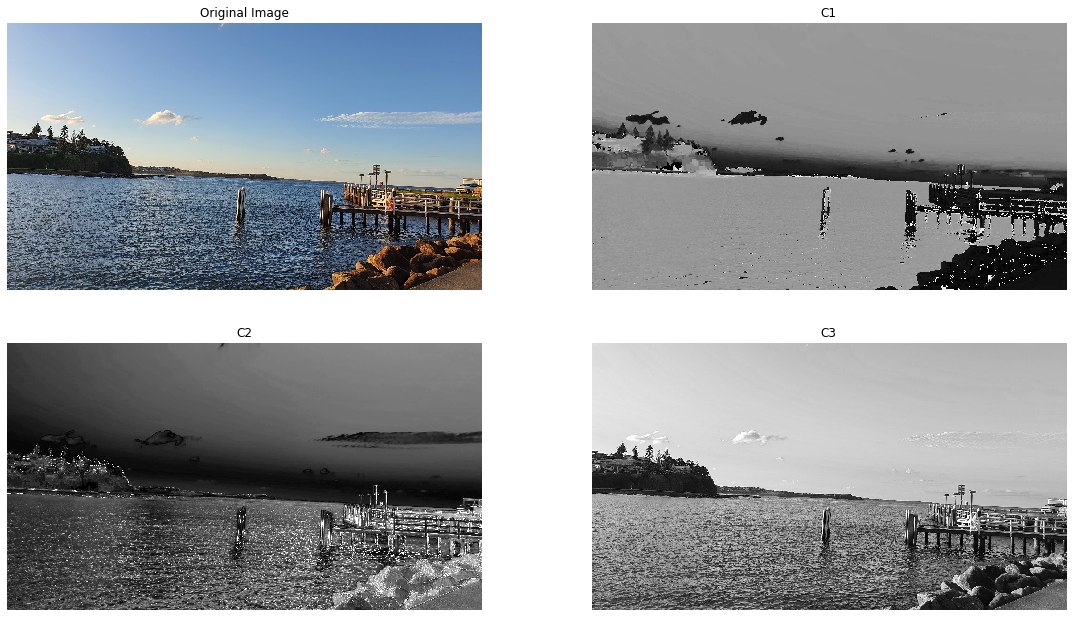

In [43]:
split('HSB', 'scenic01.jpg')